<a href="https://colab.research.google.com/github/shivsharanrupesh/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b> Customer Segmentation </b> </h1>

**1. Overview**

This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

**Data Description :**

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Attribute Information :**
Following is the Data Dictionary for customer's credit card dataset :-

<b> CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>


**2. Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score # Corrected the typo in the function name: silhoutte_score to silhouette_score
from sklearn.mixture import GaussianMixture

In [3]:
from google.colab import drive

# Mount Google Drive
drive_path = drive.mount('/content/MyDrive/')

#!ls -R '/content/MyDrive/'

Mounted at /content/MyDrive/


**3. Load Dataset:**

In [4]:
creditcard_df = pd.read_csv('/content/MyDrive/MyDrive/dataset/credit_card_dataset.csv')
creditcard_df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**4.Exploratory Data Analysis & Data Cleaning:**

In [5]:
creditcard_df.shape

(8950, 18)

In [6]:
# information about the data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Check the statistics summary of the dataframe
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# checking for Null values in data frame
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# find all columns having missing values
missing_var = [var for var in creditcard_df.columns if creditcard_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [10]:
# fill mean value in place of missing values
creditcard_df["MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())
creditcard_df["CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["CREDIT_LIMIT"].mean())

In [11]:
# Again check for null values
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [12]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [13]:
# drop unnecessary columns
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [14]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**5. Outlier Detection**

In [17]:
"""
This script identifies outliers in all numeric columns of the 'creditcard_df' dataframe.

Outliers are defined as values below the 5th percentile or above the 95th percentile.
For each numeric column, the script calculates and prints the percentage of outliers.

Process:
1. Iterates through all columns with data types 'float64' and 'int64'.
2. Computes the 5th percentile (min threshold) and 95th percentile (max threshold).
3. Filters rows within these thresholds.
4. Computes the percentage of outliers and prints the result.
"""

# Find outliers in all numeric columns
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = creditcard_df[i].quantile(0.95)  # Upper bound for non-outliers
  min_thresold = creditcard_df[i].quantile(0.05)  # Lower bound for non-outliers

  # Filter dataframe to exclude outliers
  creditcard_df_no_outlier = creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape

  # Calculate outlier percentage
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")


 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [18]:
"""
Removes outliers from specific columns in the 'creditcard_df' dataframe.

Outliers are defined as values below the 5th percentile or above the 95th percentile.
This script filters out rows where 'BALANCE', 'CREDIT_LIMIT', and 'PAYMENTS' have nearly 10% outliers.

Process:
1. Compute the 5th percentile (min threshold) and 95th percentile (max threshold) for:
   - 'BALANCE'
   - 'CREDIT_LIMIT'
   - 'PAYMENTS'
2. Retain only the rows where values in these columns are within the specified range.
3. Store the cleaned dataframe in 'creditcard_df_no_outlier'.
"""

# Define outlier thresholds for selected columns
max_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.05)

# Remove rows with outliers in selected columns
creditcard_df_no_outlier = creditcard_df[
    (creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) &
    (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) &
    (creditcard_df["BALANCE"] < max_thresold_BALANCE) &
    (creditcard_df["BALANCE"] > min_thresold_BALANCE) &
    (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) &
    (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)
]


In [19]:
# DataFrame having no outlier
creditcard_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


In [20]:
creditcard_df_no_outlier.shape

(6466, 17)

<Axes: >

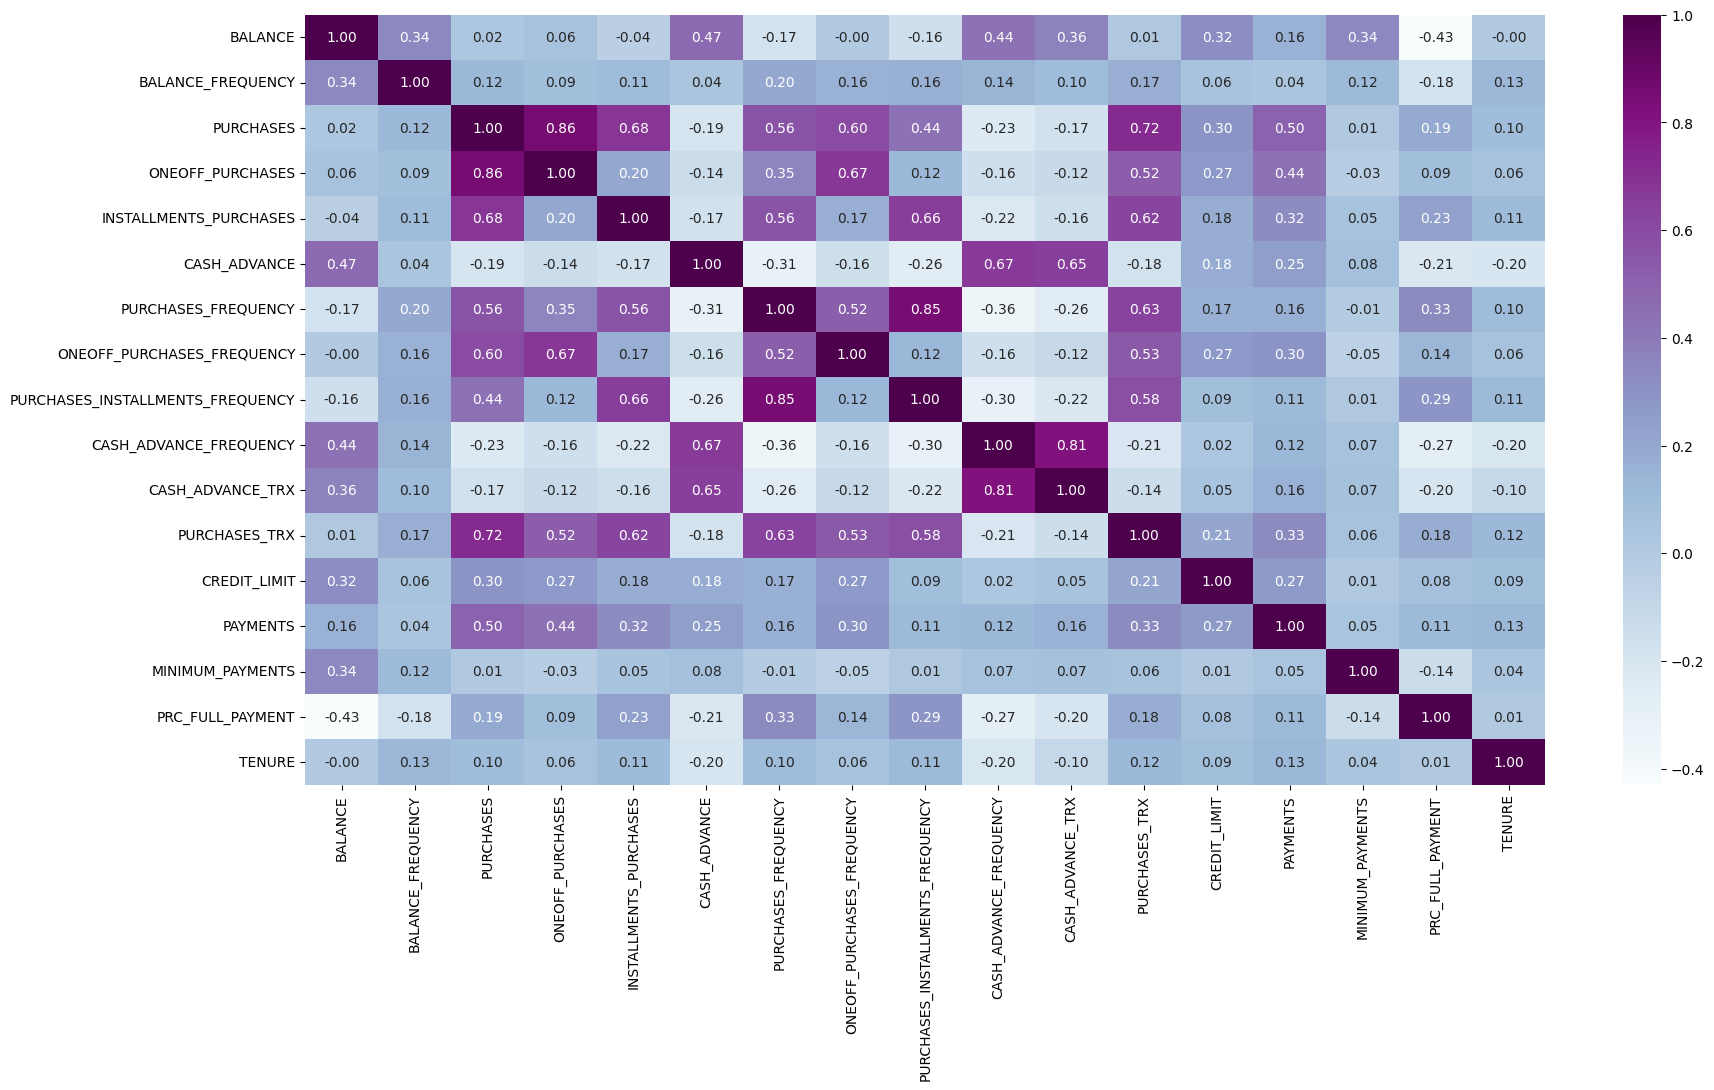

In [22]:
"""
Generates a correlation matrix heatmap for the 'creditcard_df_no_outlier' dataframe.

The correlation matrix helps to identify relationships between different numerical features.
A heatmap is plotted using Seaborn to visualize the correlation values.

Process:
1. Compute the correlation matrix of 'creditcard_df_no_outlier'.
2. Create a heatmap with annotated values, using the 'BuPu' color map.
3. Set the figure size to (20,10) for better visualization.
"""

# Set figure size
plt.figure(figsize=(20,10))

# Compute correlation matrix
corn = creditcard_df_no_outlier.corr()

# Plot heatmap with annotations
sns.heatmap(corn, annot=True, cmap="BuPu", fmt='.2f')


## From the results, we can see 3 pairs of strong correlation
1. "PURCHASES" and "ONEOFF_PURCHASES" -- 0.86
2. "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.85
3. "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.81

**6. Scaling the data**

The next step is to scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

Using the StandardScaler, we transform our dataframe into the following numpy arrays

In [23]:
"""
Scales the 'creditcard_df_no_outlier' dataframe using StandardScaler.

Standardization transforms the data to have a mean of 0 and a standard deviation of 1,
which helps in improving the performance of machine learning models.

Process:
1. Initialize StandardScaler.
2. Fit and transform 'creditcard_df_no_outlier' to scale numerical values.
3. Store the scaled data in 'creditcard_scaled_df'.
"""

# Initialize StandardScaler
scalar = StandardScaler()

# Scale the dataframe
creditcard_scaled_df = scalar.fit_transform(creditcard_df_no_outlier)


In [24]:
creditcard_scaled_df

array([[ 1.35958568, -0.02715353, -0.71136663, ...,  0.18339488,
         0.24802861,  0.33969475],
       [ 0.84268315,  0.48108734, -0.05912009, ..., -0.04878463,
        -0.51957586,  0.33969475],
       [-0.38317207,  0.48108734, -0.69786902, ..., -0.24832644,
        -0.51957586,  0.33969475],
       ...,
       [-0.94653953, -0.45069038, -0.51244565, ..., -0.32934159,
         1.783241  , -4.58327778],
       [-0.96594456, -0.45069038, -0.61814878, ..., -0.34163245,
         1.20753592, -4.58327778],
       [-0.92315108, -2.31424023, -0.71136663, ..., -0.36464695,
         0.63183085, -4.58327778]])

**7. Dimensionality reduction**

-> Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible.

-> In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

-> This can be done for a variety of reasons, such as to reduce the complexity of a model, to reduce the storage space, to improve the performance of a learning algorithm, or to make it easier to visualize the data.

-> There are several techniques for dimensionality reduction,
* including principal component analysis (PCA),
* singular value decomposition (SVD),
* and linear discriminant analysis (LDA).

Each technique uses a different method to project the data onto a lower-dimensional space while preserving important information.

In [25]:
"""
Reduces the dimensionality of the scaled dataframe using PCA for visualization.

Principal Component Analysis (PCA) transforms the high-dimensional dataset into a
lower-dimensional representation while preserving the most important variance.

Process:
1. Initialize PCA with 2 components to reduce the data to 2D.
2. Fit and transform 'creditcard_scaled_df' using PCA.
3. Convert the transformed data into a Pandas DataFrame with columns 'pca1' and 'pca2'.
4. Display the first five rows of the transformed dataset.

Returns:
- A 2D dataframe ('pca_df') containing the principal components.
"""

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA transformation
principal_comp = pca.fit_transform(creditcard_scaled_df)

# Convert transformed data into a DataFrame
pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])

# Display the first few rows
pca_df.head()


,pca1,pca2
0,-2.286551,3.003833
1,1.134728,0.431921
2,-1.458102,-1.493209
3,0.740698,-0.539446
4,0.648373,-1.077140


**8. Hyperparameter tuning**

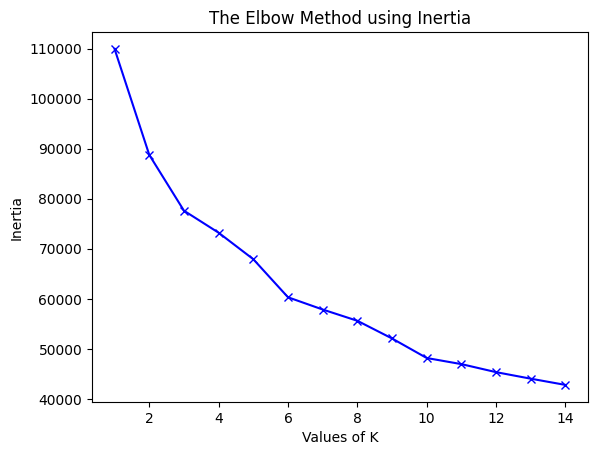

In [26]:
"""
Determines the optimal number of clusters ('k') using the Elbow Method.

The Elbow Method helps identify the best value of 'k' for K-Means clustering by
plotting the inertia (sum of squared distances) against different cluster counts.

Process:
1. Initialize an empty list 'inertia' to store inertia values.
2. Loop through values of 'k' from 1 to 14.
3. Train K-Means clustering for each 'k' and compute inertia.
4. Plot the inertia values to visualize the "elbow point," which indicates the optimal 'k'.

Returns:
- A plot showing inertia vs. 'k', where the "elbow" suggests the ideal cluster count.
"""

# List to store inertia values
inertia = []

# Range of 'k' values to test
range_val = range(1, 15)

# Compute inertia for each 'k'
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
    inertia.append(kmean.inertia_)

# Plot the Elbow Method graph
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


From this plot, 4th cluster seems to be the elbow of the curve.
However, the values does not reduce to linearly until 8th cluster, so we may consider using 8 clusters in this case.

**9. Model Building**

**K-Means Clustering**

In [27]:
"""
Applies the K-Means clustering algorithm to the scaled dataset.

This script clusters the data into 4 groups using K-Means and then appends
the cluster labels to the 2D PCA-transformed DataFrame for visualization.

Process:
1. Initialize K-Means with 4 clusters.
2. Fit and predict clusters on the scaled dataset.
3. Append the assigned cluster labels to 'pca_df' for visualization.

Returns:
- 'pca_df_kmeans': A DataFrame containing PCA components ('pca1', 'pca2') and assigned cluster labels.
"""

# Initialize K-Means with 4 clusters
kmeans_model = KMeans(4)

# Fit and predict cluster labels
kmeans_model.fit_predict(creditcard_scaled_df)

# Append cluster labels to the PCA DataFrame
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)


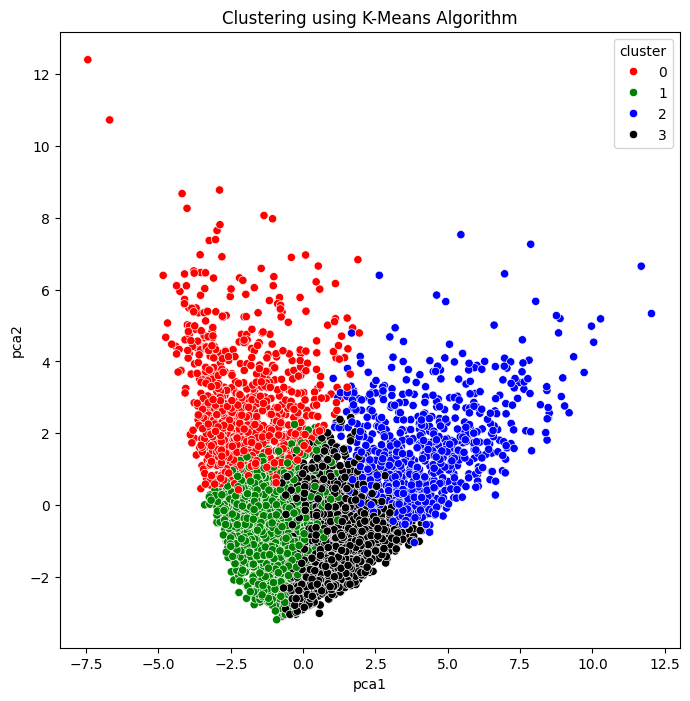

In [28]:
"""
Visualizes the clustered data using a scatter plot.

This script generates a 2D scatter plot of the clustered data, where:
- 'pca1' and 'pca2' represent the two principal components.
- Different clusters are colored distinctly.

Process:
1. Set the figure size to (8,8) for clear visualization.
2. Create a scatter plot with PCA components as x and y axes.
3. Color points based on cluster labels.
4. Display the plot with a title.

Returns:
- A scatter plot showing K-Means clustering results in a 2D PCA space.
"""

# Set figure size
plt.figure(figsize=(8,8))

# Scatter plot of PCA components with clusters
ax = sns.scatterplot(
    x="pca1", y="pca2", hue="cluster", data=pca_df_kmeans,
    palette=['red', 'green', 'blue', 'black']
)

# Set plot title
plt.title("Clustering using K-Means Algorithm")

# Display the plot
plt.show()


**9.1. Analyzing Clustering Output**

We've used K-Means model for clustering in this dataset.

In [29]:
kmeans_model.cluster_centers_.shape

(4, 17)

In [30]:
"""
Finds and visualizes the cluster centers of the K-Means model.

This script extracts the cluster centers from the fitted K-Means model and transforms them
back to the original scale of the data using the inverse of the standard scaler.

Process:
1. Extract the cluster centers from the trained K-Means model.
2. Convert the cluster centers into a DataFrame.
3. Apply inverse transformation to bring the centers back to the original scale.
4. Return the cluster centers in a readable format.

Returns:
- 'cluster_centers': A DataFrame of the cluster centers in the original data scale.
"""

# Create a DataFrame with cluster centers (in the scaled space)
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=[creditcard_df.columns])

# Inverse transform the cluster centers to bring them back to original scale
cluster_centers = scalar.inverse_transform(cluster_centers)

# Create a DataFrame with the transformed cluster centers
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])

# Display the cluster centers
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2891.532727,0.957202,320.850808,210.515971,110.370337,3198.709693,0.241678,0.117909,0.141758,0.464530,12.450920,5.293456,5134.049080,1878.449903,1263.166293,0.032044,11.152352
1,1203.077360,0.872526,278.583876,234.343098,44.427876,533.206203,0.169140,0.103765,0.064261,0.112195,1.968146,3.077361,3199.696625,909.468740,650.764014,0.046453,11.560865
2,1589.718090,0.976222,3318.299847,2133.288690,1185.836858,285.626558,0.924578,0.667710,0.689265,0.052480,1.048346,48.770992,6049.404349,2816.450794,795.068494,0.265030,11.875318
3,691.366296,0.922654,869.664625,298.400954,571.661632,147.563933,0.841423,0.210431,0.692856,0.032060,0.561259,17.726877,3857.516595,1009.554085,525.092035,0.295618,11.713317


In [31]:
"""
Assigns cluster labels to the original dataset based on K-Means clustering.

This script adds a new column to the 'creditcard_df' DataFrame, where each row
is assigned the cluster label it belongs to, as determined by the trained K-Means model.

Process:
1. Concatenate the original dataframe 'creditcard_df' with a new column 'cluster',
   which contains the cluster labels from the K-Means model.
2. Store the resulting dataframe in 'creditcard_cluster_df'.
3. Display the first few rows of the dataframe with assigned clusters.

Returns:
- 'creditcard_cluster_df': A DataFrame containing the original data along with the cluster assignments.
"""

# Add 'cluster' column with assigned labels from K-Means model
creditcard_cluster_df = pd.concat([creditcard_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

# Display the first few rows of the dataframe
creditcard_cluster_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3.0


**9.2 Outcome**

-> There are 4 clusters (segments)- each clusters are shown below in detail:

* **First Customers cluster (Transactors):** Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (104 Dollar) and cash advance (303 Dollar), Percentage of full payment = 23%

* **Second customers cluster (revolvers):** who use credit card as a loan (most lucrative sector): highest balance (5000 Dollar) and cash advance (5000 Dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

* **Third customer cluster (VIP/Prime):** high credit limit 16K Dollar and highest percentage of full payment, target for increase credit limit and increase spending habits

* **Fourth customer cluster (low tenure):** these are customers with low tenure (7 years), low balance

**9.3. Analysis of each Cluster**

Cluster - 1

In [32]:
cluster_1_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==0]
cluster_1_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2361,15532.33972,1.0,1168.75,0.0,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,5,11,16500.0,3906.738592,3379.593046,0.0,12,0.0
124,14224.11541,1.0,0.00,0.0,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12,0.0
4089,13968.47957,1.0,281.71,8.9,272.81,2710.679764,0.416667,0.083333,0.333333,0.666667,12,9,18500.0,3464.441992,3360.086085,0.0,12,0.0
723,13774.74154,1.0,404.24,0.0,404.24,3369.474535,0.250000,0.000000,0.250000,0.500000,7,3,14500.0,3167.870886,3533.464800,0.0,12,0.0
380,12474.72954,1.0,136.88,0.0,136.88,515.147607,0.166667,0.000000,0.166667,0.166667,2,2,14000.0,3519.008859,3430.627754,0.0,12,0.0


Cluster - 2

In [33]:
cluster_2_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==1]
cluster_2_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4140,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.0,0.583333,1.0,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12,1.0
520,15258.22590,1.0,529.30,529.30,0.00,4100.891579,0.5,0.500000,0.0,1.000000,23,10,19000.0,2051.146470,3905.740148,0.0,8,1.0
4708,15155.53286,1.0,717.24,717.24,0.00,4718.274895,1.0,1.000000,0.0,0.500000,7,24,18000.0,4002.194556,3843.924668,0.0,12,1.0
5913,13777.37772,1.0,0.00,0.00,0.00,1675.249576,0.0,0.000000,0.0,0.666667,11,0,14500.0,3054.844697,3242.471295,0.0,12,1.0
153,13673.07961,1.0,9792.23,3959.81,5832.42,2444.445738,1.0,0.750000,1.0,0.750000,26,216,20000.0,11717.307940,6042.391629,0.0,12,1.0


Cluster - 3 (Silver)

In [34]:
cluster_3_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==2]
cluster_3_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
501,13479.28821,1.0,41050.4,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12,2.0
495,12478.17286,1.0,174.0,174.00,0.00,3269.418821,0.250000,0.250000,0.000000,0.666667,21,3,14000.0,3251.190662,3872.099498,0.000000,12,2.0
866,11654.55492,1.0,463.0,74.00,389.00,3096.807933,0.583333,0.083333,0.416667,0.416667,17,7,12500.0,3024.609470,5148.045052,0.000000,12,2.0
3210,10871.08518,1.0,0.0,0.00,0.00,4822.559803,0.000000,0.000000,0.000000,0.166667,3,0,18000.0,2735.624602,2595.765441,0.000000,12,2.0
755,10397.09989,1.0,0.0,0.00,0.00,4045.620171,0.000000,0.000000,0.000000,0.250000,6,0,13000.0,3222.169406,2818.707479,0.000000,12,2.0


Cluster - 4

In [ ]:
cluster_4_df = creditcard_cluster_df[creditcard_cluster_df["cluster"] == 3]
cluster_4_df.sort_values(by=['BALANCE'], ascending=False).head()

**10. Save The Model**

In [35]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [39]:
# save the dataframe in .csv file named as "Clustered_Costumer_Data"
creditcard_cluster_df.to_csv("Clustered_Customer_Data.csv")
creditcard_cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,NaN


**Business Impact**

This project can significantly impact the banking sector by enabling targeted marketing strategies. Based on the model’s suggestions, Hence the Bank can offer customized products and services to specific customer segments, increasing customer retention and generating additional revenue.